## **Employee Attrition & Performance**

---

This project is part of Udacity's Data Scientist Nanodegree program In this project, I am asked to pick a dataset and answer any 3 questions from the data. The project will follow CRISP-DM process (Cross Industry Process for Data Mining):
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Evaluation
* Deployment






**Business understanding**


---




What are the reasons that make the employee resign?

The question is very important and important for the owners of companies and organizations, and there are many reasons
In the notebook I will discuss three main factors (non-competitive salary, relationship with manager, relationship with co-workers).

**Data understanding**

---



My data source is kaggle.com , it is 1 dataset only.

In the next step, I'll explain what columns are used in my analysis and modelling phase. 



**Data preparation**


---


At this stage, the data will be processed and the type of data will be displayed, and if there are missing values, it will be processed. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
HrData = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
HrData

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


**Clean the data**

In [5]:
HrData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
print(HrData.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince




 There are no missing values in the data set.





Next step Convert text categories into digital values 

In [7]:
h = (HrData.dtypes == 'object')
object_cols = list(h[h].index)
print('Categories:')
print(object_cols)

Categories:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [8]:
HrData.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [9]:
HrData.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
HrData.Over18.unique()

array(['Y'], dtype=object)

In [11]:
HrData.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [12]:
HrData['Gender']=HrData['Gender'].map({'Female':0, 'Male':1})

In [13]:
HrData['Attrition']=HrData['Attrition'].map({'Yes':1, 'No':0})

In [14]:
HrData['Over18']= HrData['Over18'].map({'Y':1})

In [15]:
HrData ['OverTime']=HrData ['OverTime'].map({'Yes':1, 'No':0})

In [16]:
HrData.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [17]:
HrData[HrData['Attrition'] == 1].describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,0.632911,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,1.0,0.535865,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,0.483031,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.0,0.499768,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,0.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,1.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.0,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,1.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.0,1.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,1.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


**Analyze**






The employee's relationship with the manager in the following diagram shows the number of years with the current manager

In [18]:
figuer = px.histogram(HrData, x="YearsWithCurrManager", color="Attrition", marginal="box")
figuer.show()


It is not important for the employee only the material factor (salary), but the moral factor is very important, the following diagram shows the relationship between them


In [19]:
figuer = px.box(HrData, x = 'Attrition', y = 'MonthlyIncome', color = 'Attrition')
figuer.show()

The relationship of co-workers with employees

In [20]:
figuer = px.box(HrData, x = 'Attrition', y = 'JobSatisfaction', color = 'Attrition')
figuer.show()

There are several columns that have the same values and have no role or importance, so they will be deleted and dispensed with

In [21]:
HrData.drop(columns = ["EmployeeCount", "Over18", "StandardHours", "EmployeeNumber", "MonthlyRate", "DailyRate", "HourlyRate"], inplace = True)
HrData.shape

(1470, 28)

In [22]:
HrData.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,0,3,2,Sales Executive,4,Single,5993,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,1,2,2,Research Scientist,2,Married,5130,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,1,2,1,Laboratory Technician,3,Single,2090,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,0,3,1,Research Scientist,3,Married,2909,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,1,3,1,Laboratory Technician,2,Married,3468,9,0,12,3,4,1,6,3,3,2,2,2,2



**Modeling**

---




First, split the data into training and testing

In [23]:
X = HrData.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].values


In [24]:
y = HrData.iloc[:, 1].values

In [32]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

In [27]:
H = MinMaxScaler()
dummies = pd.get_dummies(HrData[HrData.columns.difference(["Attrition"])])
X = H.fit_transform(dummies)
y = HrData[["Attrition"]].values.ravel()


Now use a random forest model

In [33]:
random_forest_model = RandomForestClassifier(random_state = 0)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
y_pred = random_forest_model.predict(X_test)
print("Model accruracy score: {}".format(accuracy_score(y_test, y_pred)))

Model accruracy score: 0.8668478260869565


In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       310
           1       0.91      0.17      0.29        58

    accuracy                           0.87       368
   macro avg       0.89      0.58      0.61       368
weighted avg       0.87      0.87      0.83       368




**Evaluation/Visualize**

---



As it shows us from Moodle we can say :
the model predicts quite well the "none quite employees" (92% accuracy) but it have a poor prediction of "quite employees" (29% accuracy).

**Questions and answers**

1. Is it possible that the director of the organization is uncooperative and understanding, causing an organization to lose staff?



> The failure of some managers to deal with employees properly, because it is necessary for managers and leaders to have a set of features that help them to deal with employees in a way that always lifts their morale and motivates them to work, so the owners of companies and organizations must train new managers to deal with employees, and lead them properly.








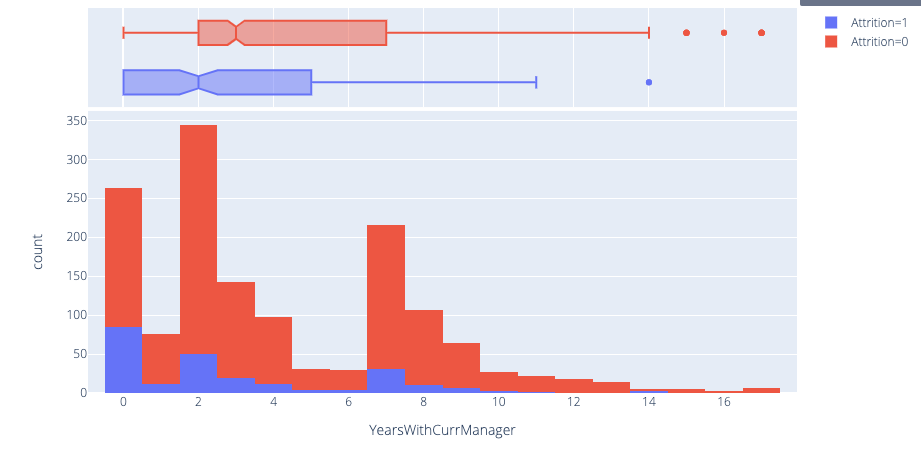

We can noobserve te that employees who resign have less time with their manager than employees who are still on the job. 


2.  Is it only the salary that attracts the employee in the work environment?


> Failure to give workers their full material rights and of course the worker's main objective of his work is financial gain, and in case of continuing to default the worker has no choice but to leave work.




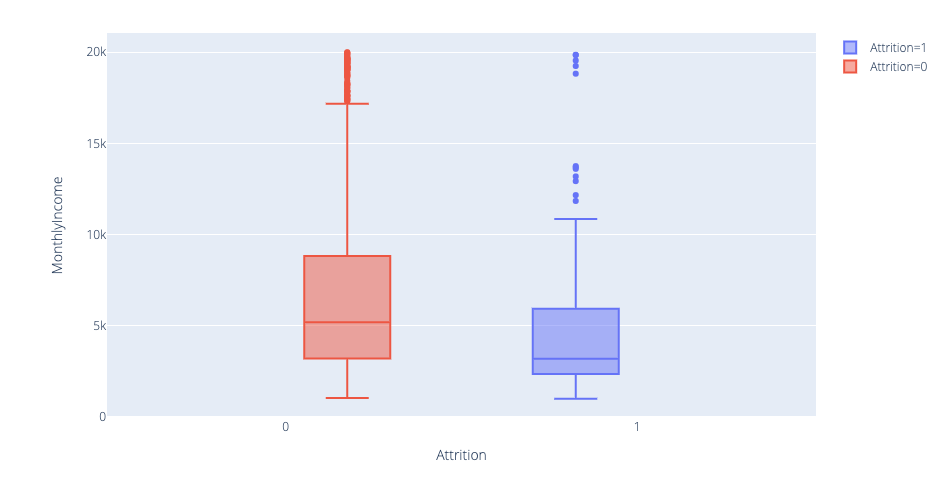

3. Is it possible to have motivating factors for an employee to stay in the organization?


> The existence of problems among employees whether the causes of these problems hatred, hatred or jealousy or lack of understanding between them and the failure to find an appropriate way to communicate and dialogue in a proper way other causes and these problems cause the misery of some employees, and this is what drives them to leave work.




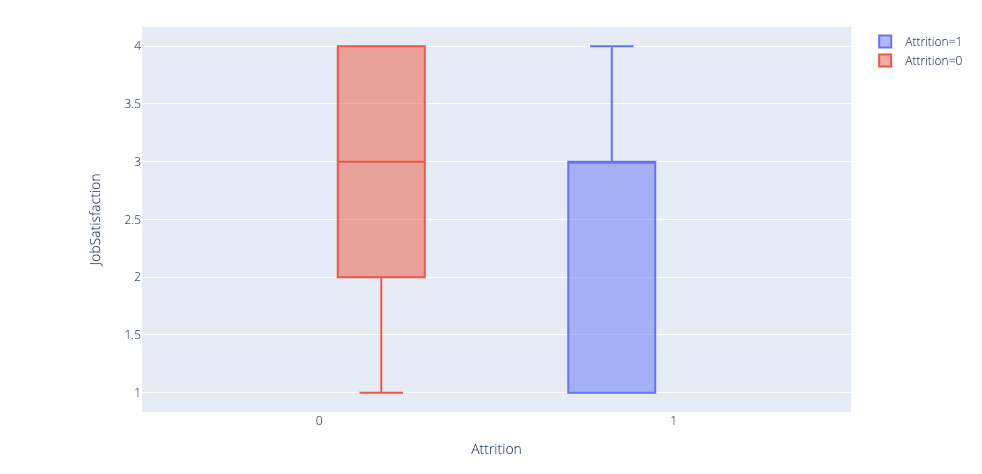

The graph shows that employees between q1 and 2 correspond to a lower satisfaction rate with coworkers.

**Conclusions**

---



While a non-competitive salary, poor work environment, or poor relationship with the boss may be reasons for terminating a worker, there can be many factors that cause an employee to leave his job other than those mentioned.